# Graph in python

## 1 使用python建立图

主要有三种思路：

- 使用邻接矩阵（比较简单就不介绍了）
- 使用邻接表
- 使用哈希索引👍（便捷，建议使用）

## 2 图相关算法

- 最小生成树算法：Prim、Kruskal
- 最短路径算法：Dijkstra、Floyd

## 1 使用Python建立图
邻接表实现无向加权图

In [144]:
class Node(object):
    def __init__(self, value):
        self.val = value
        self.next = None
    
    def __str__(self):
        return '[' + str(self.val) + ']'
        
class ArcNode(object):
    def __init__(self, value, weight):
        self.val = value
        self.weight = weight
        self.next = None
    
    def __str__(self):
        return '(' + str(self.val) + ',' + str(self.weight) + ')'
        
class Graph(object):
    def __init__(self):
        self.node_list = []
        self.__node_val_list = []
    
    def add_node(self, val):
        for i in range(len(self.node_list)):
            if self.node_list[i].val == val:
                print("node {} has already in the noe_list".format(val))
                return
        self.node_list.append(Node(val))
        self.__node_val_list.append(val)
    
    def add_edge(self, start, end, weight):
        if start not in self.__node_val_list or end not in self.__node_val_list:
            print("warnings: start node or end node is not in the node_list")
            return
        
        for i in range(len(self.node_list)):
            cur = self.node_list[i]
            if cur.val == start:
                break
        while cur.next:
            if cur.val == end:
                print("warnings: edge ({},{}) has already in the edge_list".format(start, end))
                return
            cur = cur.next
        cur.next = ArcNode(end, weight)
        
        for i in range(len(self.node_list)):
            cur = self.node_list[i]
            if cur.val == end:
                break
        while cur.next:
            if cur.val == start:
                print("warnings: edge ({},{}) has already in the edge_list".format(end, start))
                return
            cur = cur.next
        cur.next = ArcNode(start, weight)
    
    def print_graph(self):
        print('Printing the graph...', end = '')
        for i in range(len(self.node_list)):
            cur = self.node_list[i]
            print('\n{}'.format(cur), end = '')
            cur = cur.next
            while cur:
                print('->{}'.format(cur), end='')
                cur = cur.next

In [145]:
# Generate the graph

graph = Graph()

for i in range(1, 6):
    graph.add_node(i)

graph.add_edge(1, 2, 3)
graph.add_edge(1, 3, 5)
graph.add_edge(1, 4, 10)
graph.add_edge(3, 2, 1)
graph.add_edge(3, 4, 2)
graph.add_edge(5, 2, 12)
graph.add_edge(5, 3, 3)
graph.add_edge(5, 4, 11)

In [146]:
graph.print_graph()

Printing the graph...
[1]->(2,3)->(3,5)->(4,10)
[2]->(1,3)->(3,1)->(5,12)
[3]->(1,5)->(2,1)->(4,2)->(5,3)
[4]->(1,10)->(3,2)->(5,11)
[5]->(2,12)->(3,3)->(4,11)

## 1 使用Python建图 👍
dict建立有向加权图(方便起见，后面都用哈希索引建立邻接表)

In [142]:
# Generate graph

"""
[[1,2,3],[1,3,5],[1,4,1],[5,2,10],[5,3,9],[5,4,11],[3,2,9],[3,4,7]]
"""
graph = {}
for start, end, weight in [[1,2,3],[1,3,5],[1,4,1],[5,2,10],[5,3,9],[5,4,11],[3,2,9],[3,4,7]]:
    if start not in graph:
        graph[start] = {}
    if end not in graph[start]:
        graph[start][end] = weight


In [143]:
graph

{1: {2: 3, 3: 5, 4: 1}, 3: {2: 9, 4: 7}, 5: {2: 10, 3: 9, 4: 11}}

## 2 图相关算法-最短路径
多源最短路径算法-Floyd
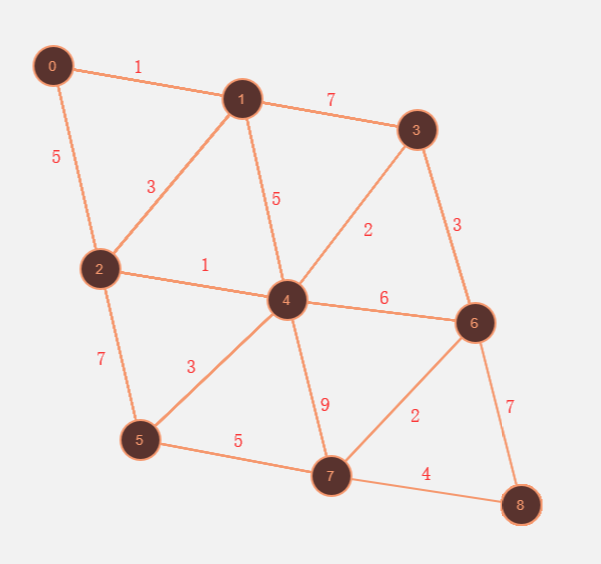

In [40]:
import numpy as np
"""
i->i的距离设置为无穷大，但在floyd算法中可以将其设置为0，对结果没有影响
graph = [
    [float('inf'),1,5,float('inf'),float('inf'),float('inf'),float('inf'),float('inf'),float('inf')],
    [1,float('inf'),3,7,5,float('inf'),float('inf'),float('inf'),float('inf')],
    [5,3,float('inf'),float('inf'),1,7,float('inf'),float('inf'),float('inf')],
    [float('inf'),7,float('inf'),float('inf'),2,float('inf'),3,float('inf'),float('inf')],
    [float('inf'),5,1,2,float('inf'),3,6,9,float('inf')],
    [float('inf'),float('inf'),7,float('inf'),3,float('inf'),float('inf'),5,float('inf')],
    [float('inf'),float('inf'),float('inf'),3,6,float('inf'),float('inf'),2,7],
    [float('inf'),float('inf'),float('inf'),float('inf'),9,5,2,float('inf'),4],
    [float('inf'),float('inf'),float('inf'),float('inf'),float('inf'),float('inf'),7,4,float('inf')]
]
"""

graph = [
    [0,1,5,float('inf'),float('inf'),float('inf'),float('inf'),float('inf'),float('inf')],
    [1,0,3,7,5,float('inf'),float('inf'),float('inf'),float('inf')],
    [5,3,0,float('inf'),1,7,float('inf'),float('inf'),float('inf')],
    [float('inf'),7,float('inf'),0,2,float('inf'),3,float('inf'),float('inf')],
    [float('inf'),5,1,2,0,3,6,9,float('inf')],
    [float('inf'),float('inf'),7,float('inf'),3,0,float('inf'),5,float('inf')],
    [float('inf'),float('inf'),float('inf'),3,6,float('inf'),0,2,7],
    [float('inf'),float('inf'),float('inf'),float('inf'),9,5,2,0,4],
    [float('inf'),float('inf'),float('inf'),float('inf'),float('inf'),float('inf'),7,4,0]
]


# Floyd
def floyd(graph):
    path = [[-1 for i in range(len(graph))] for j in range(len(graph))]
    for k in range(len(graph)):
        for i in range(len(graph)):
            for j in range(len(graph)):
                if graph[i][k] + graph[k][j] < graph[i][j]:
                    graph[i][j] = graph[i][k] + graph[k][j]
                    path[i][j] = k
    return np.array(graph), np.array(path)

# 打印相关路径
def print_path(path, start, end, arr):
    k = path[start][end] 
    if k == -1:
        return
    print_path(path, start, k, arr)
    arr.append(k)
    print_path(path, k, end, arr)

In [38]:
graph

[[0, 1, 5, inf, inf, inf, inf, inf, inf],
 [1, 0, 3, 7, 5, inf, inf, inf, inf],
 [5, 3, 0, inf, 1, 7, inf, inf, inf],
 [inf, 7, inf, 0, 2, inf, 3, inf, inf],
 [inf, 5, 1, 2, 0, 3, 6, 9, inf],
 [inf, inf, 7, inf, 3, 0, inf, 5, inf],
 [inf, inf, inf, 3, 6, inf, 0, 2, 7],
 [inf, inf, inf, inf, 9, 5, 2, 0, 4],
 [inf, inf, inf, inf, inf, inf, 7, 4, 0]]

In [39]:
graph, path = floyd(graph)
graph, path

(array([[ 0,  1,  4,  7,  5,  8, 10, 12, 16],
        [ 1,  0,  3,  6,  4,  7,  9, 11, 15],
        [ 4,  3,  0,  3,  1,  4,  6,  8, 12],
        [ 7,  6,  3,  0,  2,  5,  3,  5,  9],
        [ 5,  4,  1,  2,  0,  3,  5,  7, 11],
        [ 8,  7,  4,  5,  3,  0,  7,  5,  9],
        [10,  9,  6,  3,  5,  7,  0,  2,  6],
        [12, 11,  8,  5,  7,  5,  2,  0,  4],
        [16, 15, 12,  9, 11,  9,  6,  4,  0]]),
 array([[-1, -1,  1,  4,  2,  4,  4,  6,  7],
        [-1, -1, -1,  4,  2,  4,  4,  6,  7],
        [ 1, -1, -1,  4, -1,  4,  4,  6,  7],
        [ 4,  4,  4, -1, -1,  4, -1,  6,  7],
        [ 2,  2, -1, -1, -1, -1,  3,  6,  7],
        [ 4,  4,  4,  4, -1, -1,  7, -1,  7],
        [ 4,  4,  4, -1,  3,  7, -1, -1,  7],
        [ 6,  6,  6,  6,  6, -1, -1, -1, -1],
        [ 7,  7,  7,  7,  7,  7,  7, -1, -1]]))

In [35]:
for i in range(len(graph)):
    for j in range(i + 1, len(graph)):
        arr = []
        print_path(path, i, j, arr)
        print('{}->{}:{}'.format(i, j, [i] + arr + [j]))

0->1:[0, 1]
0->2:[0, 1, 2]
0->3:[0, 1, 2, 4, 3]
0->4:[0, 1, 2, 4]
0->5:[0, 1, 2, 4, 5]
0->6:[0, 1, 2, 4, 3, 6]
0->7:[0, 1, 2, 4, 3, 6, 7]
0->8:[0, 1, 2, 4, 3, 6, 7, 8]
1->2:[1, 2]
1->3:[1, 2, 4, 3]
1->4:[1, 2, 4]
1->5:[1, 2, 4, 5]
1->6:[1, 2, 4, 3, 6]
1->7:[1, 2, 4, 3, 6, 7]
1->8:[1, 2, 4, 3, 6, 7, 8]
2->3:[2, 4, 3]
2->4:[2, 4]
2->5:[2, 4, 5]
2->6:[2, 4, 3, 6]
2->7:[2, 4, 3, 6, 7]
2->8:[2, 4, 3, 6, 7, 8]
3->4:[3, 4]
3->5:[3, 4, 5]
3->6:[3, 6]
3->7:[3, 6, 7]
3->8:[3, 6, 7, 8]
4->5:[4, 5]
4->6:[4, 3, 6]
4->7:[4, 3, 6, 7]
4->8:[4, 3, 6, 7, 8]
5->6:[5, 7, 6]
5->7:[5, 7]
5->8:[5, 7, 8]
6->7:[6, 7]
6->8:[6, 7, 8]
7->8:[7, 8]


## 2 图相关算法-最短路径
单源最短路径算法-Dijkstra